# IPL 2023

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Deliveries_data = pd.read_csv(r"D:\Python\7.Pandas\IPL 2023\each_ball_records.csv")
Match_data = pd.read_csv(r"D:\Python\7.Pandas\IPL 2023\each_match_records.csv")

In [3]:
Match_data = Match_data.rename(columns={'match_number': 'match_no'})
Match_data.head()

,season,date,match_no,match_type,venue,location,team1,team2,toss_won,toss_decision,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,man_of_match
0,2023,31-03-2023,1,Group,Narendra Modi Stadium,Ahmedabad,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,Nitin Menon,HAS Khalid,A Bengeri,J Srinath,Gujarat Titans,NaN,5.0,Rashid Khan
1,2023,01-04-2023,2,Group,Punjab Cricket Association IS Bindra Stadium,Chandigarh,Punjab Kings,Kolkata Knight Riders,Kolkata Knight Riders,field,BNJ Oxenford,YC Barde,PM Joshi,M Nayyar,Punjab Kings,7.0,NaN,Arshdeep Singh
2,2023,01-04-2023,3,Group,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow,Lucknow Super Giants,Delhi Capitals,Delhi Capitals,field,AK Chaudhary,NA Patwardhan,M Kuppuraj,DS Manohar,Lucknow Super Giants,50.0,NaN,MA Wood
3,2023,02-04-2023,4,Group,Rajiv Gandhi International Stadium,Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,KN Ananthapadmanabhan,R Pandit,Abhijit Bhattacharya,V Narayan Kutty,Rajasthan Royals,72.0,NaN,JC Buttler
4,2023,02-04-2023,5,Group,M Chinnaswamy Stadium,Bengaluru,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Nitin Menon,Tapan Sharma,A Bengeri,J Srinath,Royal Challengers Bangalore,NaN,8.0,F du Plessis


In [4]:
# Function to determine batting and bowling teams
def determine_teams(row):
    if row['toss_decision'] == 'bat':
        batting_team = row['toss_won']
        bowling_team = row['team2'] if row['team1'] == row['toss_won'] else row['team1']
    else:
        bowling_team = row['toss_won']
        batting_team = row['team2'] if row['team1'] == row['toss_won'] else row['team1']
    return batting_team, bowling_team

# Apply the function to the DataFrame
Match_data[['batting_team', 'bowling_team']] = Match_data.apply(determine_teams, axis=1, result_type='expand')

Match_data[['batting_team', 'bowling_team']]

,batting_team,bowling_team
0,Chennai Super Kings,Gujarat Titans
1,Punjab Kings,Kolkata Knight Riders
2,Lucknow Super Giants,Delhi Capitals
3,Rajasthan Royals,Sunrisers Hyderabad
4,Mumbai Indians,Royal Challengers Bangalore
...,...,...
69,Royal Challengers Bangalore,Gujarat Titans
70,Chennai Super Kings,Gujarat Titans
71,Mumbai Indians,Lucknow Super Giants
72,Gujarat Titans,Mumbai Indians


In [5]:
Deliveries_data = pd.merge(Deliveries_data, Match_data[['match_no','season','batting_team', 'bowling_team']], on='match_no', how='left')

In [6]:
Deliveries_data.head()

,match_no,ballnumber,inningno,over,outcome,batter,bowler,comment,score,dismissal_kind,season,batting_team,bowling_team
0,1,1,1,0.1,0,Devon Conway,Mohammed Shami,"Mohammed Shami to Devon Conway, no run,",0,Notout,2023,Chennai Super Kings,Gujarat Titans
1,1,2,1,0.2,1lb,Devon Conway,Mohammed Shami,"Mohammed Shami to Devon Conway, 1 leg bye,",1,Notout,2023,Chennai Super Kings,Gujarat Titans
2,1,3,1,0.3,0,Ruturaj Gaikwad,Mohammed Shami,"Mohammed Shami to Ruturaj Gaikwad, no run,",0,Notout,2023,Chennai Super Kings,Gujarat Titans
3,1,4,1,0.4,1,Ruturaj Gaikwad,Mohammed Shami,"Mohammed Shami to Ruturaj Gaikwad, 1 run,",1,Notout,2023,Chennai Super Kings,Gujarat Titans
4,1,5,1,0.5,0,Devon Conway,Mohammed Shami,"Mohammed Shami to Devon Conway, no run,",0,Notout,2023,Chennai Super Kings,Gujarat Titans


<pre><code>=IF(ISNUMBER(SEARCH("Wicket - b", H2)), "Bowled",
 IF(ISNUMBER(SEARCH("Wicket - c", H2)), "Caught",
 IF(ISNUMBER(SEARCH("Wicket - lbw", H2)), "LBW",
 IF(ISNUMBER(SEARCH("Wicket - st", H2)), "Stumped",
 IF(ISNUMBER(SEARCH("Wicket - runout", H2)), "Runout",
 "Notout")))))</code></pre>

In [7]:
Deliveries_data.dismissal_kind.unique()

array(['Notout', 'Bowled', 'Caught', 'LBW', 'Stumped', 'Runout'],
      dtype=object)

In [8]:
Match_data.shape

(74, 20)

In [9]:
Deliveries_data.shape

(17863, 13)

In [10]:
Match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          74 non-null     int64  
 1   date            74 non-null     object 
 2   match_no        74 non-null     int64  
 3   match_type      74 non-null     object 
 4   venue           74 non-null     object 
 5   location        74 non-null     object 
 6   team1           74 non-null     object 
 7   team2           74 non-null     object 
 8   toss_won        74 non-null     object 
 9   toss_decision   74 non-null     object 
 10  umpire1         74 non-null     object 
 11  umpire2         74 non-null     object 
 12  reserve_umpire  74 non-null     object 
 13  match_referee   74 non-null     object 
 14  winner          74 non-null     object 
 15  winner_runs     40 non-null     float64
 16  winner_wickets  33 non-null     float64
 17  man_of_match    73 non-null     objec

In [11]:
Deliveries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17863 entries, 0 to 17862
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   match_no        17863 non-null  int64  
 1   ballnumber      17863 non-null  int64  
 2   inningno        17863 non-null  int64  
 3   over            17863 non-null  float64
 4   outcome         17863 non-null  object 
 5   batter          17863 non-null  object 
 6   bowler          17863 non-null  object 
 7   comment         17863 non-null  object 
 8   score           17863 non-null  int64  
 9   dismissal_kind  17863 non-null  object 
 10  season          17863 non-null  int64  
 11  batting_team    17863 non-null  object 
 12  bowling_team    17863 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 1.8+ MB


In [12]:
Match_data.isnull().sum()

season             0
date               0
match_no           0
match_type         0
venue              0
location           0
team1              0
team2              0
toss_won           0
toss_decision      0
umpire1            0
umpire2            0
reserve_umpire     0
match_referee      0
winner             0
winner_runs       34
winner_wickets    41
man_of_match       1
batting_team       0
bowling_team       0
dtype: int64

In [13]:
Deliveries_data.isnull().sum()

match_no          0
ballnumber        0
inningno          0
over              0
outcome           0
batter            0
bowler            0
comment           0
score             0
dismissal_kind    0
season            0
batting_team      0
bowling_team      0
dtype: int64

In [14]:
Match_data.duplicated().sum()
Deliveries_data.duplicated().sum()

0

### 1) What was the count of matches played in 2023 season?

In [15]:
print('Total Matches Played in 2023:',Match_data.shape[0])

Total Matches Played in 2023: 74


In [16]:
print('Venues Played At:',Match_data['venue'].unique().tolist()) 

Venues Played At: ['Narendra Modi Stadium', 'Punjab Cricket Association IS Bindra Stadium', 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium', 'Rajiv Gandhi International Stadium', 'M Chinnaswamy Stadium', 'MA Chidambaram Stadium', 'Arun Jaitley Stadium', 'Barsapara Cricket Stadium', 'Eden Gardens', 'Wankhede Stadium', 'Sawai Mansingh Stadium', 'Himachal Pradesh Cricket Association Stadium']


In [17]:
print('Teams : ',Match_data['team1'].unique().tolist())

Teams :  ['Chennai Super Kings', 'Punjab Kings', 'Lucknow Super Giants', 'Rajasthan Royals', 'Mumbai Indians', 'Delhi Capitals', 'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Gujarat Titans', 'Royal Challengers Bangalore']


### 2) How many runs were scored in 2023 season?

In [18]:
season = Deliveries_data.groupby(['season'])['score'].sum().reset_index()
print(season)

   season  score
0    2023  25684


### 4) Who has umpired the most?

In [19]:
ump=pd.concat([Match_data['umpire1'],Match_data['umpire2']])
ump=ump.value_counts()
umps=ump.to_frame().reset_index()
umps.head(10)

,index,count
0,Nitin Menon,11
1,AK Chaudhary,10
2,VK Sharma,10
3,RJ Tucker,10
4,KN Ananthapadmanabhan,9
5,J Madanagopal,9
6,CB Gaffaney,8
7,NA Patwardhan,7
8,Vinod Seshan,7
9,BNJ Oxenford,7


#### 5) Which team has won the most tosses?

In [20]:
toss=Match_data['toss_won'].value_counts()
toss

toss_won
Rajasthan Royals               10
Chennai Super Kings            10
Mumbai Indians                 10
Gujarat Titans                  9
Royal Challengers Bangalore     8
Delhi Capitals                  7
Sunrisers Hyderabad             7
Kolkata Knight Riders           5
Punjab Kings                    5
Lucknow Super Giants            3
Name: count, dtype: int64

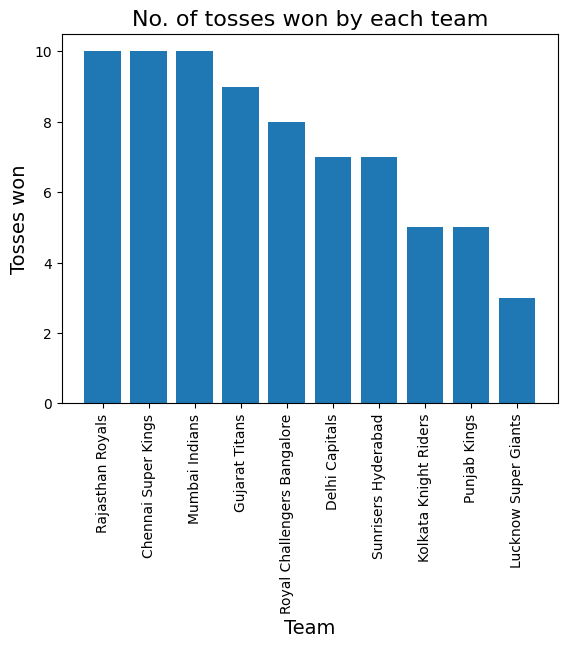

In [21]:
plt.bar(toss.index, toss)
plt.title("No. of tosses won by each team",fontsize=16)
plt.xlabel("Team",fontsize=14)
plt.ylabel("Tosses won",fontsize=14)
plt.xticks(rotation=90)
plt.show()

### 6) What does the team decide after winning the toss?

In [22]:
temp_series = Match_data.toss_decision.value_counts()
temp_series

toss_decision
field    53
bat      21
Name: count, dtype: int64

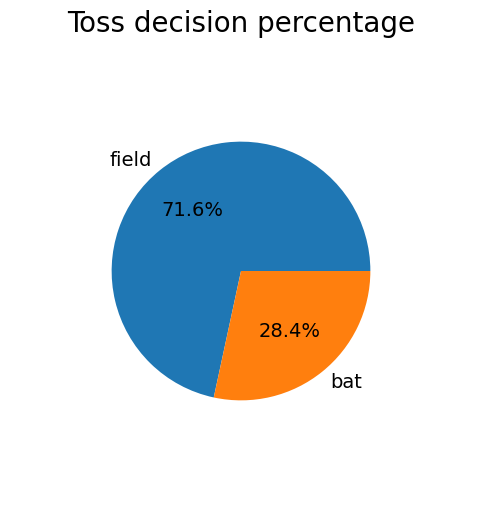

In [23]:
labels = temp_series.index
values = (temp_series / temp_series.sum()) * 100
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14}, radius=0.7)
plt.title("Toss decision percentage", fontsize=20)
plt.show()

### 7) Does winning the toss implies winning the game?

In [24]:
Match_data['toss_win_game_win'] = np.where((Match_data.toss_won == Match_data.winner),'Yes','No')

In [25]:
Match_data.groupby('toss_won')['toss_win_game_win'].value_counts()

toss_won                     toss_win_game_win
Chennai Super Kings          Yes                  6
                             No                   4
Delhi Capitals               No                   4
                             Yes                  3
Gujarat Titans               Yes                  6
                             No                   3
Kolkata Knight Riders        No                   4
                             Yes                  1
Lucknow Super Giants         No                   2
                             Yes                  1
Mumbai Indians               Yes                  6
                             No                   4
Punjab Kings                 No                   4
                             Yes                  1
Rajasthan Royals             No                   6
                             Yes                  4
Royal Challengers Bangalore  No                   4
                             Yes                  4
Sunrisers Hyderab

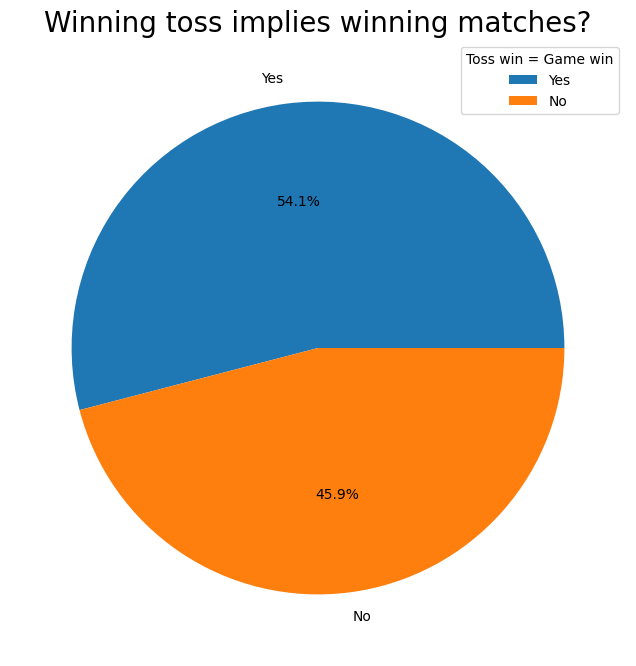

In [26]:
labels = ["Yes", "No"]
values = Match_data["toss_win_game_win"].value_counts()
plt.figure(figsize=(10, 8))
plt.title("Winning toss implies winning matches?", fontsize=20)
plt.pie(values, labels=labels, autopct="%1.1f%%")
plt.legend(title="Toss win = Game win", loc="best")
plt.show()

### 8) How many times chasing team has won the match?

In [27]:
Match_data.groupby('toss_decision')['winner'].count()

toss_decision
bat      21
field    53
Name: winner, dtype: int64

### 9) Which team has won the tournament in 2023 Season?

In [28]:
Match_data.groupby('season').agg({'winner': 'last'})

,winner
season,
2023,Chennai Super Kings


### 10) Which team has played the most number of matches?

In [29]:
teams = pd.concat([Match_data['team1'], Match_data['team2']]).value_counts().reset_index()
teams.columns = ['Team Name', 'Total Matches played']
teams.style.background_gradient(cmap='PuBu')

,Team Name,Total Matches played
0,Gujarat Titans,17
1,Chennai Super Kings,16
2,Mumbai Indians,16
3,Lucknow Super Giants,15
4,Punjab Kings,14
5,Rajasthan Royals,14
6,Delhi Capitals,14
7,Kolkata Knight Riders,14
8,Sunrisers Hyderabad,14
9,Royal Challengers Bangalore,14


### 11) Which team has won the most number of times?

In [30]:
wins=pd.DataFrame(Match_data['winner'].value_counts()).reset_index()
wins.columns=['Team Name','Wins']
wins.style.background_gradient(cmap='PuBu')

,Team Name,Wins
0,Gujarat Titans,11
1,Chennai Super Kings,10
2,Mumbai Indians,9
3,Lucknow Super Giants,8
4,Rajasthan Royals,7
5,Royal Challengers Bangalore,7
6,Punjab Kings,6
7,Kolkata Knight Riders,6
8,Delhi Capitals,5
9,Sunrisers Hyderabad,4


C:\Users\Admin\AppData\Local\Temp\ipykernel_17992\3247660367.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Team Name", y="Wins", data=wins.sort_values(by='Wins', ascending=False), palette='Greens')


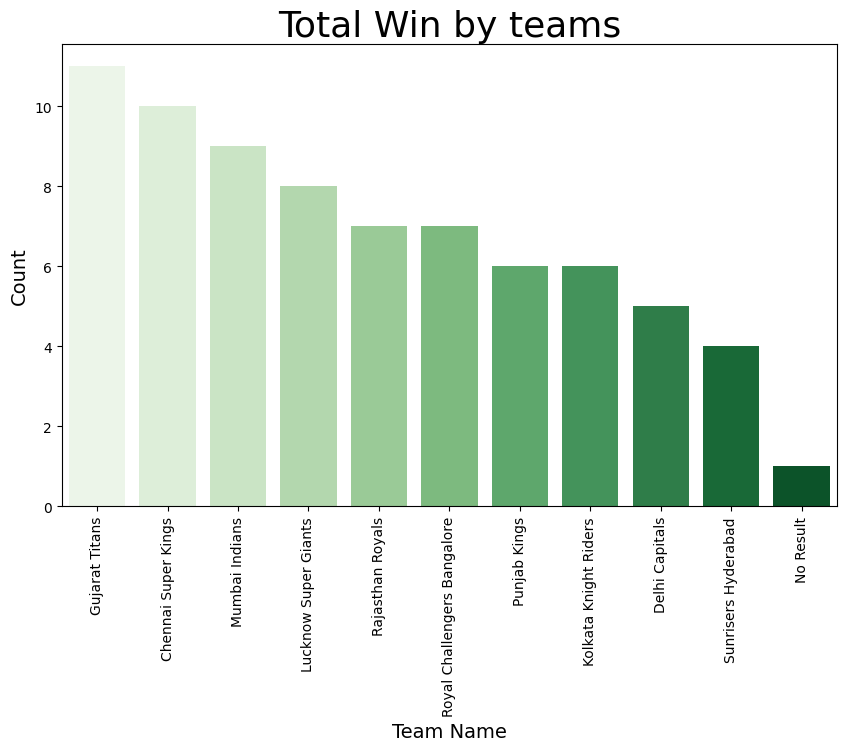

In [31]:
plt.subplots(figsize=(10,6))
sns.barplot(x="Team Name", y="Wins", data=wins.sort_values(by='Wins', ascending=False), palette='Greens')
plt.title("Total Win by teams", fontsize=26)
plt.xlabel("Team Name",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.xticks(rotation=90)
plt.show()

#### 12) Which team has the highest winning percentage?

In [32]:
played=teams.merge(wins,left_on='Team Name',right_on='Team Name',how='inner')
played['% Win']=(played['Wins']/played['Total Matches played'])*100
played.sort_values(by=['% Win'],ascending=False).reset_index().drop('index',axis=1).style.background_gradient(cmap='PuBu',subset=['% Win'])

,Team Name,Total Matches played,Wins,% Win
0,Gujarat Titans,17,11,64.705882
1,Chennai Super Kings,16,10,62.500000
2,Mumbai Indians,16,9,56.250000
3,Lucknow Super Giants,15,8,53.333333
4,Rajasthan Royals,14,7,50.000000
5,Royal Challengers Bangalore,14,7,50.000000
6,Punjab Kings,14,6,42.857143
7,Kolkata Knight Riders,14,6,42.857143
8,Delhi Capitals,14,5,35.714286
9,Sunrisers Hyderabad,14,4,28.571429


### 13) Is there any lucky venue for a particular team?

In [33]:
def lucky(Match_data,team_name):
    return Match_data[Match_data['winner']==team_name]['venue'].value_counts().nlargest(10)

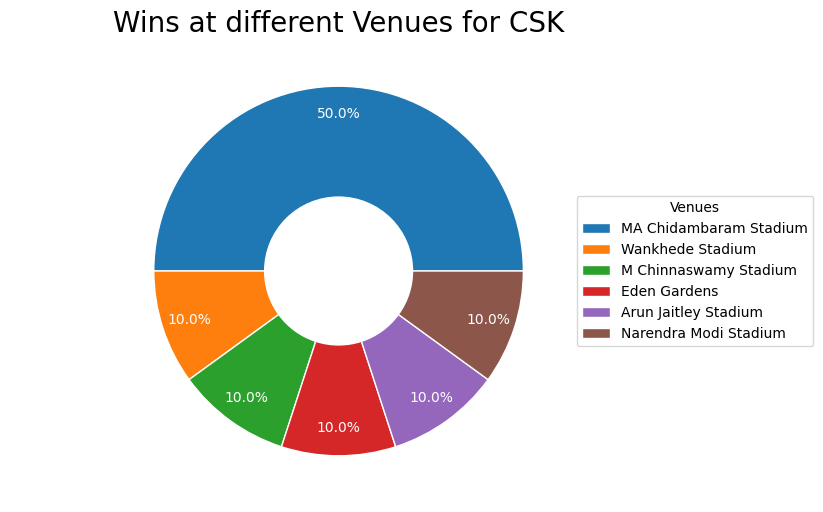

In [34]:
mi = lucky(Match_data, 'Chennai Super Kings')# Royal Challengers Bangalore
values = mi
labels = mi.index
fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.1f%%', pctdistance=0.85,
                                  textprops=dict(color="w"), wedgeprops=dict(width=0.6, edgecolor='w'))
for w in wedges:
    w.set_edgecolor('w')
ax.legend(wedges, labels, title="Venues", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title('Wins at different Venues for CSK', fontsize=20)
plt.show()

In [35]:
Deliveries_data.columns

Index(['match_no', 'ballnumber', 'inningno', 'over', 'outcome', 'batter',
       'bowler', 'comment', 'score', 'dismissal_kind', 'season',
       'batting_team', 'bowling_team'],
      dtype='object')

### 14) Particular Batsmen analysis

In [36]:
Deliveries_data.groupby('batter')['score'].sum().sort_values(ascending= False).head(10).to_frame()

,score
batter,
Shubman Gill,916
Faf du Plessis,735
Devon Conway,684
Virat Kohli,657
Yashasvi Jaiswal,637
Ruturaj Gaikwad,608
Suryakumar Yadav,604
David Warner,526
Rinku Singh,495


In [37]:
filt=(Deliveries_data['batter']=='Shubman Gill')
df_gill=Deliveries_data[filt]
df_gill.head()

,match_no,ballnumber,inningno,over,outcome,batter,bowler,comment,score,dismissal_kind,season,batting_team,bowling_team
125,1,5,2,0.5,2,Shubman Gill,Deepak Chahar,"Deepak Chahar to Shubman Gill, 2 runs,",2,Notout,2023,Chennai Super Kings,Gujarat Titans
126,1,6,2,0.6,0,Shubman Gill,Deepak Chahar,"Deepak Chahar to Shubman Gill, no run,",0,Notout,2023,Chennai Super Kings,Gujarat Titans
130,1,10,2,1.4,0,Shubman Gill,Tushar Deshpande,"Tushar Deshpande to Shubman Gill, no run,",0,Notout,2023,Chennai Super Kings,Gujarat Titans
131,1,11,2,1.5,4,Shubman Gill,Tushar Deshpande,"Tushar Deshpande to Shubman Gill, Four,",4,Notout,2023,Chennai Super Kings,Gujarat Titans
132,1,12,2,1.6,0,Shubman Gill,Tushar Deshpande,"Tushar Deshpande to Shubman Gill, no run,",0,Notout,2023,Chennai Super Kings,Gujarat Titans


In [38]:
df_gill['score'].sum()

916

In [39]:
# how many sixs
len(df_gill[df_gill['score']==6])

32

In [40]:
# how many fours
len(df_gill[df_gill['score']==4])

85

In [41]:
# Grouping data by innings and summing up the runs
runs_by_position = df_gill.groupby('inningno')['score'].sum()

print(runs_by_position)

inningno
1    511
2    405
Name: score, dtype: int64


score
1    264
0    144
4     85
2     49
6     32
3      4
5      2
Name: count, dtype: int64


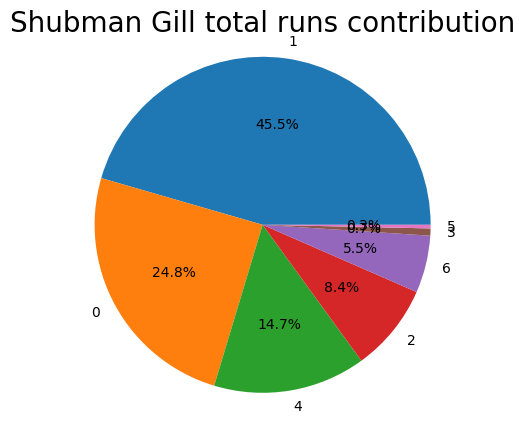

In [42]:
# Get the value counts of runs scored
runs_counts = df_gill['score'].value_counts()
print(runs_counts)

# Plotting the pie chart
plt.pie(runs_counts, labels=runs_counts.index, autopct='%1.1f%%')
plt.title('Shubman Gill total runs contribution', fontsize=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

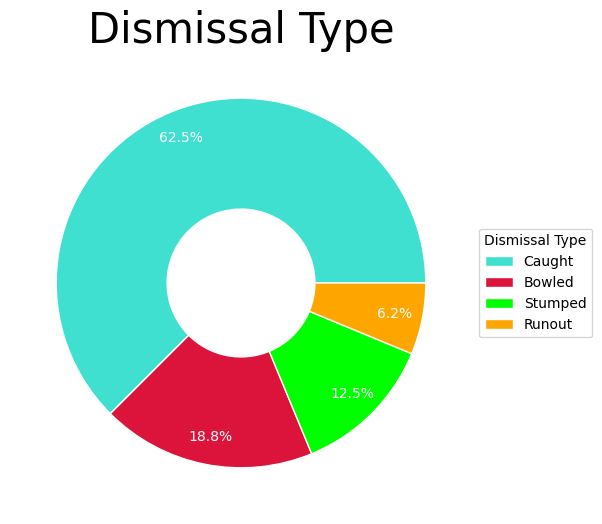

In [43]:
plt.figure(figsize=(10, 6))

# Filter out 'not out' from the DataFrame
filtered_df = df_gill[df_gill['dismissal_kind'] != 'Notout']

values = filtered_df['dismissal_kind'].value_counts()
colors = ['turquoise', 'crimson', 'lime', 'orange', 'blue', 'green']

plt.pie(values, labels=values.index, colors=colors, autopct='%1.1f%%', pctdistance=0.85,
        textprops=dict(color="w"), wedgeprops=dict(width=0.6, edgecolor='w'))

plt.title('Dismissal Type', fontsize=30)
plt.legend(title="Dismissal Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

#### 15) Innings wise comparison between teams

In [44]:
runs=Deliveries_data.groupby(['match_no','inningno','batting_team'])[['score']].sum().reset_index()
runs.drop('match_no',axis=1,inplace=True)
runs.head()

,inningno,batting_team,score
0,1,Chennai Super Kings,178
1,2,Chennai Super Kings,182
2,1,Punjab Kings,191
3,2,Punjab Kings,146
4,1,Lucknow Super Giants,193


In [45]:
inning1=runs[runs['inningno']==1]
inning1.sort_values(by='score', ascending=False)

,inningno,batting_team,score
74,1,Lucknow Super Giants,257
64,1,Chennai Super Kings,235
143,1,Gujarat Titans,232
36,1,Sunrisers Hyderabad,228
99,1,Gujarat Titans,227
...,...,...,...
54,1,Kolkata Knight Riders,127
84,1,Royal Challengers Bangalore,126
88,1,Lucknow Super Giants,125
18,1,Sunrisers Hyderabad,121


In [46]:
inning2=runs[runs['inningno']==2]
inning2.sort_values(by='score', ascending=False)

,inningno,batting_team,score
47,2,Chennai Super Kings,218
102,2,Rajasthan Royals,217
90,2,Punjab Kings,216
83,2,Rajasthan Royals,214
29,2,Royal Challengers Bangalore,213
...,...,...,...
17,2,Kolkata Knight Riders,123
94,2,Rajasthan Royals,119
85,2,Royal Challengers Bangalore,108
142,2,Mumbai Indians,101


## **Batting First**

C:\Users\Admin\AppData\Local\Temp\ipykernel_17992\436241680.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='batting_team', y='score', data=inning1.sort_values(by='score', ascending=False), palette='Set1')


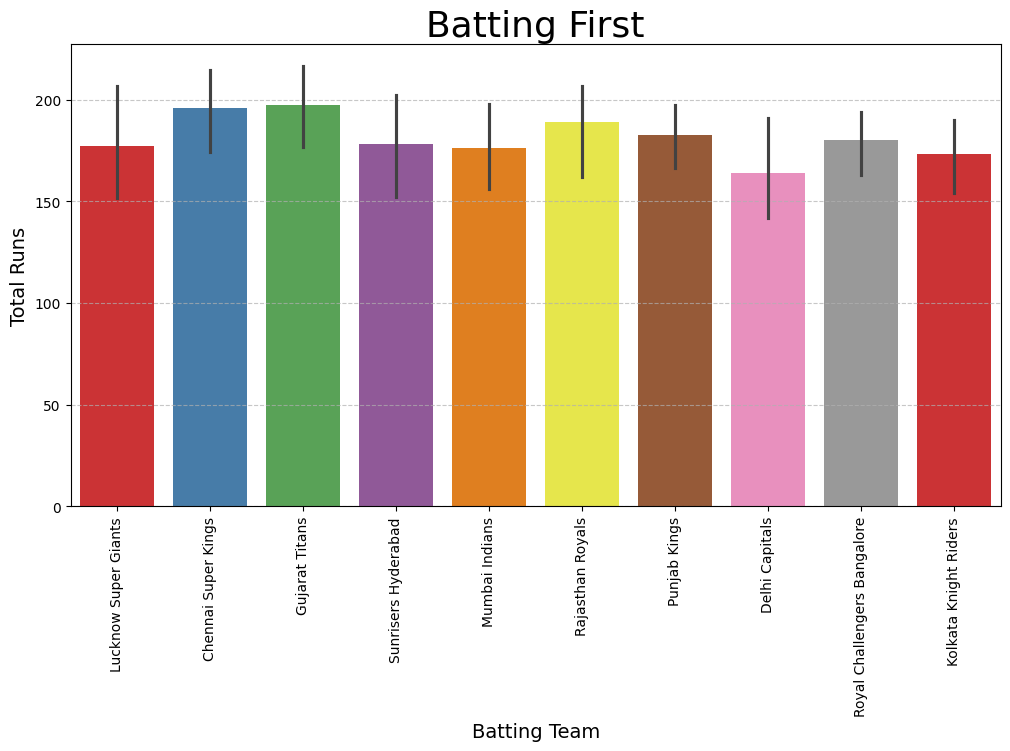

In [47]:
# Plotting the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='batting_team', y='score', data=inning1.sort_values(by='score', ascending=False), palette='Set1')
plt.title('Batting First', fontsize=26)
plt.xlabel('Batting Team', fontsize=14)
plt.ylabel('Total Runs', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.show()

## **Batting First**

C:\Users\Admin\AppData\Local\Temp\ipykernel_17992\539362147.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='batting_team', y='score', data=inning2.sort_values(by='score', ascending=False), palette='Set2')


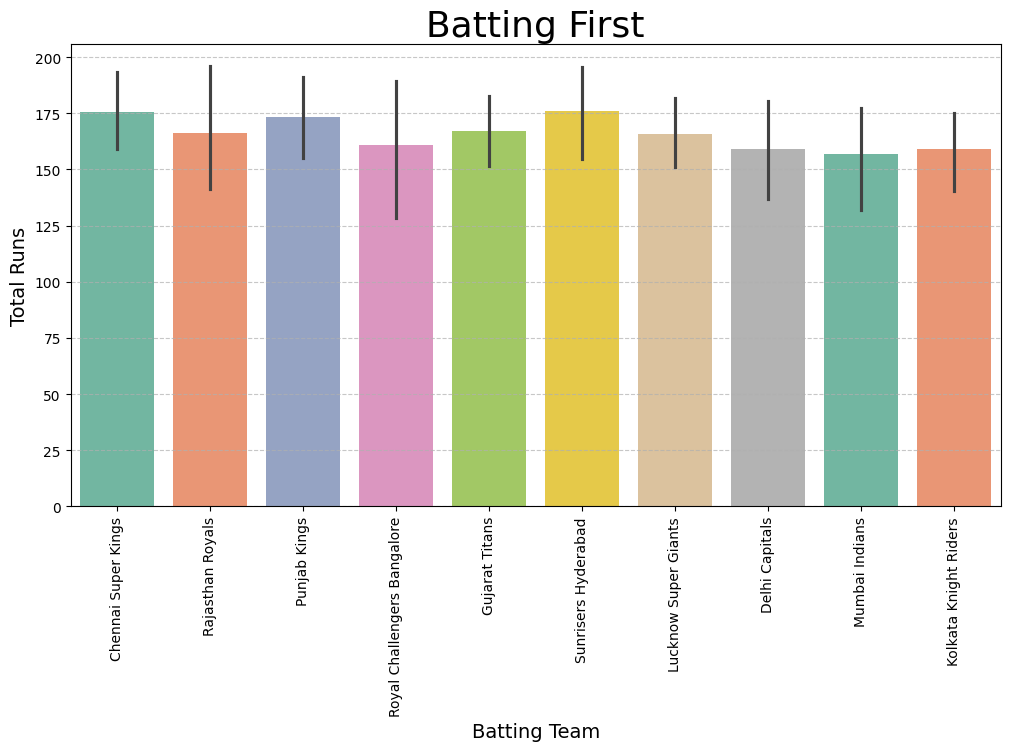

In [48]:
# Plotting the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='batting_team', y='score', data=inning2.sort_values(by='score', ascending=False), palette='Set2')
plt.title('Batting First', fontsize=26)
plt.xlabel('Batting Team', fontsize=14)
plt.ylabel('Total Runs', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.show()

### 16) Which team has scored the most number of 200+ scores?

In [49]:
high_scores=Deliveries_data.groupby(['match_no', 'inningno','batting_team','bowling_team'])['score'].sum().reset_index() 
score_200=high_scores[high_scores['score']>=200].sort_values('score', ascending=False)
score_200.head(5)

,match_no,inningno,batting_team,bowling_team,score
74,38,1,Lucknow Super Giants,Punjab Kings,257
64,33,1,Chennai Super Kings,Kolkata Knight Riders,235
143,73,1,Gujarat Titans,Mumbai Indians,232
36,19,1,Sunrisers Hyderabad,Kolkata Knight Riders,228
99,51,1,Gujarat Titans,Lucknow Super Giants,227


In [50]:
x1=score_200['batting_team'].value_counts()
x1=pd.DataFrame(x1)
x1.style.background_gradient(cmap='PuBu')

,count
batting_team,
Chennai Super Kings,8
Gujarat Titans,6
Rajasthan Royals,6
Sunrisers Hyderabad,4
Punjab Kings,4
Royal Challengers Bangalore,3
Lucknow Super Giants,2
Kolkata Knight Riders,2
Mumbai Indians,1


### 17) Which team has conceded 200+ scores the most?

In [51]:
z=score_200['bowling_team'].value_counts()
z=pd.DataFrame(z)
z.style.background_gradient(cmap='PuBu')

,count
bowling_team,
Mumbai Indians,11
Punjab Kings,5
Kolkata Knight Riders,5
Lucknow Super Giants,5
Royal Challengers Bangalore,4
Sunrisers Hyderabad,3
Chennai Super Kings,2
Delhi Capitals,1
Gujarat Titans,1


#### 18) What was the highest run scored by a team in a single match?

In [52]:
high_scores=Deliveries_data.groupby(['match_no', 'inningno','batting_team','bowling_team'])['score'].sum().reset_index() 
high_scores['score'].max()

257

In [53]:
high_scores['score'].min()

59

In [54]:
Deliveries_data.columns

Index(['match_no', 'ballnumber', 'inningno', 'over', 'outcome', 'batter',
       'bowler', 'comment', 'score', 'dismissal_kind', 'season',
       'batting_team', 'bowling_team'],
      dtype='object')

### 19) Which is the biggest win in terms of run margin?

In [55]:
Match_data[Match_data['winner_runs']==Match_data['winner_runs'].max()]

,season,date,match_no,match_type,venue,location,team1,team2,toss_won,toss_decision,...,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,man_of_match,batting_team,bowling_team,toss_win_game_win
59,2023,14-05-2023,60,Group,Sawai Mansingh Stadium,Jaipur,Royal Challengers Bangalore,Rajasthan Royals,Royal Challengers Bangalore,bat,...,Navdeep Singh,P Joshi,V Narayan Kutty,Royal Challengers Bangalore,112.0,NaN,WD Parnell,Royal Challengers Bangalore,Rajasthan Royals,Yes


In [56]:
Match_data[Match_data['winner_wickets']==Match_data['winner_wickets'].max()]

,season,date,match_no,match_type,venue,location,team1,team2,toss_won,toss_decision,...,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,man_of_match,batting_team,bowling_team,toss_win_game_win
47,2023,05-05-2023,48,Group,Sawai Mansingh Stadium,Jaipur,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,...,VK Sharma,VM Dhokre,J Srinath,Gujarat Titans,NaN,9.0,Rashid Khan,Rajasthan Royals,Gujarat Titans,No
55,2023,11-05-2023,56,Group,Eden Gardens,Kolkata,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,field,...,MV Saidharshan Kumar,P Joshi,P Dharmani,Rajasthan Royals,NaN,9.0,YBK Jaiswal,Kolkata Knight Riders,Rajasthan Royals,Yes


#### 20) Which batsmen have played the most number of balls?

In [57]:
balls_played=Deliveries_data.groupby(['batter'])['ballnumber'].count().reset_index()
balls_played.sort_values(by='ballnumber',ascending=False).head(10).style.background_gradient(cmap='PuBu')

,batter,ballnumber
149,Shubman Gill,580
42,Devon Conway,481
45,Faf du Plessis,475
167,Virat Kohli,469
136,Ruturaj Gaikwad,408
36,David Warner,401
175,Yashasvi Jaiswal,384
152,Suryakumar Yadav,334
129,Rinku Singh,331
57,Ishan Kishan,318


#### 21) Who are the leading run-scorers of all time?

In [58]:
runs=Deliveries_data.groupby(['batter'])['score'].sum().reset_index()
runs.columns=['Batsman','runs']
y=runs.sort_values(by='runs',ascending=False).head(10).reset_index().drop('index',axis=1)
y.style.background_gradient(cmap='PuBu')

,Batsman,runs
0,Shubman Gill,916
1,Faf du Plessis,735
2,Devon Conway,684
3,Virat Kohli,657
4,Yashasvi Jaiswal,637
5,Ruturaj Gaikwad,608
6,Suryakumar Yadav,604
7,David Warner,526
8,Rinku Singh,495
9,Ishan Kishan,463


#### 22) Who has hit the most number of 4's?

In [59]:
four=Deliveries_data[Deliveries_data['score']==4]
runs_4=four.groupby('batter')['score'].count().reset_index()
runs_4.columns=['Batsman','4s']
runs_4.sort_values(by='4s',ascending=False).head(10).reset_index().drop('index',axis=1).style.background_gradient(cmap='PuBu')

,Batsman,4s
0,Shubman Gill,85
1,Yashasvi Jaiswal,82
2,Devon Conway,76
3,David Warner,68
4,Virat Kohli,65
5,Suryakumar Yadav,61
6,Faf du Plessis,59
7,Ishan Kishan,54
8,Shikhar Dhawan,49
9,Wriddhiman Saha,47


#### 23) Who has hit the most number of 6's?

In [60]:
six=Deliveries_data.groupby('batter')['score'].agg(lambda x: (x==6).sum()).reset_index()
six.columns=['Batsman','6s']
six.sort_values(by='6s',ascending=False).head(10).reset_index().drop('index',axis=1).style.background_gradient(cmap='PuBu')

,Batsman,6s
0,Faf du Plessis,36
1,Shivam Dube,35
2,Shubman Gill,32
3,Glenn Maxwell,31
4,Ruturaj Gaikwad,30
5,Rinku Singh,27
6,Suryakumar Yadav,27
7,Marcus S,27
8,Nicholas Pooran,26
9,Heinrich Klaasen,25


#### 24) Who has the highest strike rate?

In [61]:
player=pd.concat([runs,balls_played.iloc[:,1],runs_4.iloc[:,1],six.iloc[:,1]],axis=1)
player['strike_rate']=player['runs']/player['ballnumber']*100
player['4s'].fillna(0,inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_17992\2827353916.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  player['4s'].fillna(0,inplace=True)


In [62]:
sr=player[player.ballnumber > 100]
sr.sort_values(by='strike_rate',ascending=False).head(10)
reqsr=sr.drop(columns=['runs','ballnumber','4s','6s'],axis=1)
reqsr.sort_values(by='strike_rate',ascending=False).head(10).style.background_gradient(cmap='PuBu')

,Batsman,strike_rate
47,Glenn Maxwell,185.333333
152,Suryakumar Yadav,180.838323
55,Heinrich Klaasen,175.572519
8,Ajinkya Rahane,174.869110
80,Liam Livings,169.714286
108,Nicholas Pooran,167.289720
111,Philip Salt,166.666667
175,Yashasvi Jaiswal,165.885417
165,Vijay Shankar,165.641026
30,Cameron Green,164.338235


In [63]:
Deliveries_data.columns

Index(['match_no', 'ballnumber', 'inningno', 'over', 'outcome', 'batter',
       'bowler', 'comment', 'score', 'dismissal_kind', 'season',
       'batting_team', 'bowling_team'],
      dtype='object')

#### 26) Who is the leading wicket-taker?

In [64]:
dismissal_kinds = ['Bowled', 'Caught', 'LBW', 'Stumped']
bowler = Deliveries_data[Deliveries_data["dismissal_kind"].isin(dismissal_kinds)]['bowler'].value_counts().head(10)
bowler

bowler
Mohammed Shami         28
Mohit Sharma           27
Rashid Khan            27
Piyush Chawla          22
Tushar Deshpande       21
Yuzvendra Chahal       21
Ravindra Jadeja        20
Varun Chakravarthy     20
Matheesha Pathirana    19
Mohammed Siraj         19
Name: count, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_17992\3815076605.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bowler[:10].index, y=bowler[:10], palette=colors)


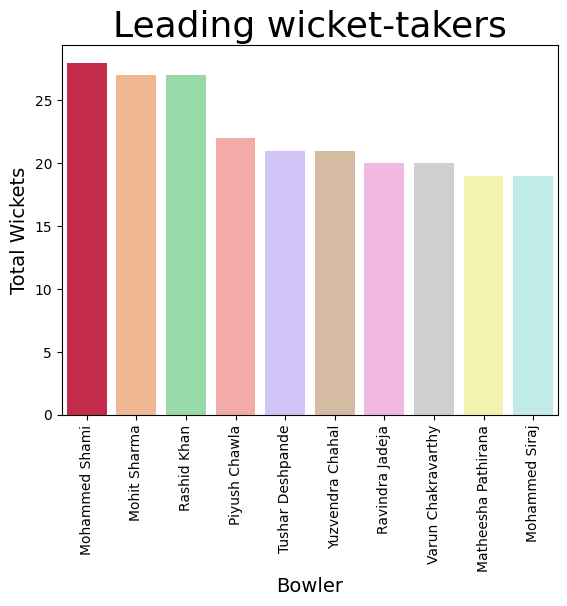

In [65]:
colors = sns.color_palette("pastel")[:13]
colors[0] = "crimson"
sns.barplot(x=bowler[:10].index, y=bowler[:10], palette=colors)
plt.title("Leading wicket-takers", fontsize=26)
plt.xlabel("Bowler",fontsize=14)
plt.ylabel("Total Wickets",fontsize=14
          )
plt.xticks(rotation=90)
plt.show()

#### 27) Which stadium has hosted the most number of matches?

In [66]:
Match_data['venue'].value_counts()[:10].to_frame()

,count
venue,
Narendra Modi Stadium,9
MA Chidambaram Stadium,9
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium,7
Rajiv Gandhi International Stadium,7
M Chinnaswamy Stadium,7
Arun Jaitley Stadium,7
Eden Gardens,7
Wankhede Stadium,7
Punjab Cricket Association IS Bindra Stadium,5


C:\Users\Admin\AppData\Local\Temp\ipykernel_17992\2489088589.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Match_data['venue'].value_counts()[:10].index, y=Match_data['venue'].value_counts()[:10], palette=colors)


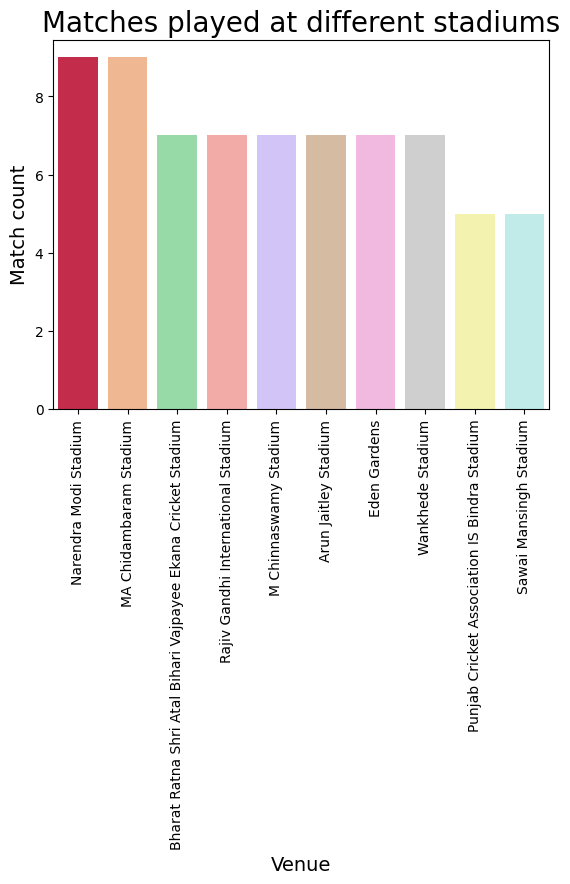

In [67]:
colors = sns.color_palette("pastel")[:13]
colors[0] = "crimson"
sns.barplot(x=Match_data['venue'].value_counts()[:10].index, y=Match_data['venue'].value_counts()[:10], palette=colors)
plt.title("Matches played at different stadiums", fontsize=20)
plt.xlabel("Venue",fontsize=14)
plt.ylabel("Match count",fontsize=14)
plt.xticks(rotation=90)
plt.show()

#### 28) Who has won the most MOM awards?

In [68]:
Match_data.man_of_match.value_counts().to_frame().head(10)

,count
man_of_match,
Shubman Gill,4
YBK Jaiswal,4
MP Stoinis,3
DP Conway,3
RA Jadeja,3
N Pooran,2
RD Gaikwad,2
SA Yadav,2
CV Varun,2


C:\Users\Admin\AppData\Local\Temp\ipykernel_17992\4234555234.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Match_data.man_of_match.value_counts()[:10].index, y=Match_data.man_of_match.value_counts()[:10], palette=colors)


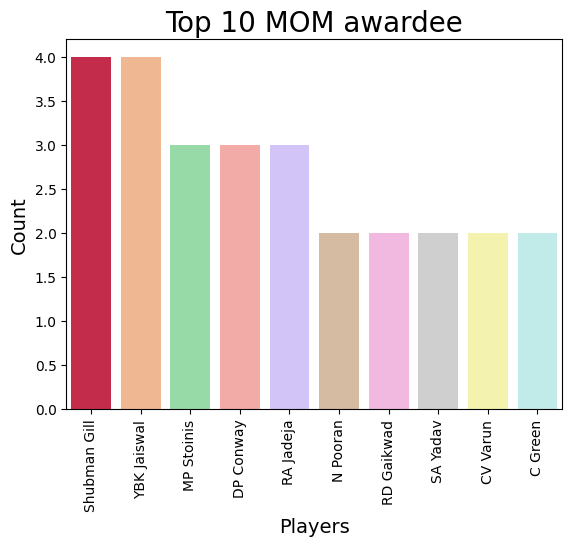

In [69]:
colors = sns.color_palette("pastel")[:11]
colors[0] = "crimson"
sns.barplot(x=Match_data.man_of_match.value_counts()[:10].index, y=Match_data.man_of_match.value_counts()[:10], palette=colors)
plt.title("Top 10 MOM awardee", fontsize=20)
plt.xlabel("Players",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.xticks(rotation=90)
plt.show()

#### 29) What is the count of fours hit in 2023 season?

In [70]:
Deliveries_data.columns

Index(['match_no', 'ballnumber', 'inningno', 'over', 'outcome', 'batter',
       'bowler', 'comment', 'score', 'dismissal_kind', 'season',
       'batting_team', 'bowling_team'],
      dtype='object')

In [71]:
fours_list = Deliveries_data[Deliveries_data['score'] == 4].groupby(Deliveries_data['match_no'].map(Match_data.set_index('match_no')['season'])).size()
fours_list = fours_list.reset_index(name='fours')
fours_list.columns = ['season', 'fours']
fours_list

,season,fours
0,2023,2196


#### 30) What is the count of sixes hit in each season?

In [72]:
six_list = Deliveries_data[Deliveries_data['score'] == 6].groupby(Deliveries_data['match_no'].map(Match_data.set_index('match_no')['season'])).size()
six_list = six_list.reset_index(name='sixs')
six_list.columns = ['season', 'sixs']
six_list

,season,sixs
0,2023,1110


In [73]:
runs4=np.dot(fours_list,4)
runs6=np.dot(six_list,6)

#### 31) What is the count of runs scored from boundaries in each season?

In [74]:
runs4=np.dot(fours_list,4)
runs6=np.dot(six_list,6)
boundary_run = runs4 + runs6
boundary_run

array([[20230, 15444]], dtype=int64)

### 32)The strike rate of each team in the first 6 overs.

In [75]:
# Filter data for first 6 overs
first_6_overs_runs = Deliveries_data[Deliveries_data['over'] <= 6].groupby('batting_team')['score'].sum()
first_6_overs_runs.to_frame('first_6_overs_runs').reset_index()

,batting_team,first_6_overs_runs
0,Chennai Super Kings,989
1,Delhi Capitals,477
2,Gujarat Titans,853
3,Kolkata Knight Riders,776
4,Lucknow Super Giants,623
5,Mumbai Indians,620
6,Punjab Kings,947
7,Rajasthan Royals,764
8,Royal Challengers Bangalore,887
9,Sunrisers Hyderabad,751


### 33)Determine the strike rate of each team in the last 5 overs.

In [76]:
# Filter data for the last 5 overs
last_5_overs = Deliveries_data[Deliveries_data['over'] > Deliveries_data['over'].max() - 5]

# Calculate the total runs scored by each team in the last 5 overs
last_5_overs_runs = last_5_overs.groupby('batting_team')['score'].sum()
last_5_overs_runs.to_frame('last_5_overs').reset_index()

,batting_team,last_5_overs
0,Chennai Super Kings,945
1,Delhi Capitals,505
2,Gujarat Titans,757
3,Kolkata Knight Riders,523
4,Lucknow Super Giants,686
5,Mumbai Indians,516
6,Punjab Kings,917
7,Rajasthan Royals,676
8,Royal Challengers Bangalore,738
9,Sunrisers Hyderabad,649


### 34)Compare the strike rates between the first 6 overs and the last 5 overs for each team.

In [77]:
# Calculate the total balls faced by each team in the first 6 overs
balls_faced = Deliveries_data[(Deliveries_data['over'] <= 6) & (Deliveries_data['inningno'] == 1)].groupby('batting_team').size()

# Calculate the strike rate for each team
strike_rate = (first_6_overs_runs / balls_faced) * 100
strike_rate.to_frame('Strike Rate').reset_index()

,batting_team,Strike Rate
0,Chennai Super Kings,295.223881
1,Delhi Capitals,255.080214
2,Gujarat Titans,285.284281
3,Kolkata Knight Riders,289.552239
4,Lucknow Super Giants,240.540541
5,Mumbai Indians,283.105023
6,Punjab Kings,274.492754
7,Rajasthan Royals,289.393939
8,Royal Challengers Bangalore,270.426829
9,Sunrisers Hyderabad,283.396226


In [78]:
# Calculate the total balls faced by each team in the last 5 overs
balls_faced_last_5_overs = last_5_overs.groupby('batting_team').size()

# Calculate the strike rate for each team in the last 5 overs
strike_rate_last_5_overs = (last_5_overs_runs / balls_faced_last_5_overs) * 100
strike_rate_last_5_overs.to_frame('strike_rate_last_5_overs').reset_index()

,batting_team,strike_rate_last_5_overs
0,Chennai Super Kings,159.628378
1,Delhi Capitals,170.033670
2,Gujarat Titans,167.108168
3,Kolkata Knight Riders,142.506812
4,Lucknow Super Giants,163.723150
5,Mumbai Indians,163.291139
6,Punjab Kings,179.452055
7,Rajasthan Royals,171.139241
8,Royal Challengers Bangalore,151.229508
9,Sunrisers Hyderabad,166.410256


In [79]:
Deliveries_data

,match_no,ballnumber,inningno,over,outcome,batter,bowler,comment,score,dismissal_kind,season,batting_team,bowling_team
0,1,1,1,0.1,0,Devon Conway,Mohammed Shami,"Mohammed Shami to Devon Conway, no run,",0,Notout,2023,Chennai Super Kings,Gujarat Titans
1,1,2,1,0.2,1lb,Devon Conway,Mohammed Shami,"Mohammed Shami to Devon Conway, 1 leg bye,",1,Notout,2023,Chennai Super Kings,Gujarat Titans
2,1,3,1,0.3,0,Ruturaj Gaikwad,Mohammed Shami,"Mohammed Shami to Ruturaj Gaikwad, no run,",0,Notout,2023,Chennai Super Kings,Gujarat Titans
3,1,4,1,0.4,1,Ruturaj Gaikwad,Mohammed Shami,"Mohammed Shami to Ruturaj Gaikwad, 1 run,",1,Notout,2023,Chennai Super Kings,Gujarat Titans
4,1,5,1,0.5,0,Devon Conway,Mohammed Shami,"Mohammed Shami to Devon Conway, no run,",0,Notout,2023,Chennai Super Kings,Gujarat Titans
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17858,74,95,2,0.1,0,Wriddhiman Saha,Deepak Chahar,"Deepak Chahar to Wriddhiman Saha, no run,",0,Notout,2023,Gujarat Titans,Chennai Super Kings
17859,74,96,2,0.2,0,Wriddhiman Saha,Deepak Chahar,"Deepak Chahar to Wriddhiman Saha, no run,",0,Notout,2023,Gujarat Titans,Chennai Super Kings
17860,74,97,2,0.3,1,Wriddhiman Saha,Deepak Chahar,"Deepak Chahar to Wriddhiman Saha, 1 run,",1,Notout,2023,Gujarat Titans,Chennai Super Kings
17861,74,98,2,0.4,1,Shubman Gill,Deepak Chahar,"Deepak Chahar to Shubman Gill, 1 run,",1,Notout,2023,Gujarat Titans,Chennai Super Kings


In [81]:
Deliveries_data['outcome'].unique()

array(['0', '1lb', '1', '4', 'w', '6', '1nb', '4lb', '2', '1b', '1wd',
       '2nb', '5nb', '7nb', '3', '5wd', '4b', '2wd', '5', '3wd', '2lb',
       '3nb', '2b'], dtype=object)

In [88]:
extra = Deliveries_data[~(Deliveries_data['outcome'].isin(['0','1','2','3','4','5','6','w']))]
extra1 = extra.groupby(['match_no', 'inningno'])['score'].sum()
extra1.reset_index()

,match_no,inningno,score
0,1,1,8
1,1,2,13
2,2,1,8
3,2,2,13
4,3,1,8
...,...,...,...
141,72,2,10
142,73,1,14
143,73,2,8
144,74,1,4


In [86]:
extra

,match_no,ballnumber,inningno,over,outcome,batter,bowler,comment,score,dismissal_kind,season,batting_team,bowling_team
1,1,2,1,0.2,1lb,Devon Conway,Mohammed Shami,"Mohammed Shami to Devon Conway, 1 leg bye,",1,Notout,2023,Chennai Super Kings,Gujarat Titans
13,1,14,1,2.2,w,Devon Conway,Mohammed Shami,"Mohammed Shami to Devon Conway, no run, ...",0,Bowled,2023,Chennai Super Kings,Gujarat Titans
27,1,28,1,4.4,1nb,Moeen Ali,Mohammed Shami,"Mohammed Shami to Moeen Ali, 1 no ball,",1,Notout,2023,Chennai Super Kings,Gujarat Titans
35,1,36,1,5.5,w,Moeen Ali,Rashid Khan,"Rashid Khan to Moeen Ali, no run, ...",0,Caught,2023,Chennai Super Kings,Gujarat Titans
46,1,47,1,7.4,w,Ben S,Rashid Khan,"Rashid Khan to Ben Stokes, no run, ...",0,Caught,2023,Chennai Super Kings,Gujarat Titans
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17808,74,45,2,6.6,w,Devon Conway,Noor Ahmad,"Noor Ahmad to Devon Conway, no run, ...",0,Caught,2023,Gujarat Titans,Chennai Super Kings
17815,74,52,2,8.1,1wd,Ajinkya Rahane,Noor Ahmad,"Noor Ahmad to Ajinkya Rahane, 1 wide,",1,Notout,2023,Gujarat Titans,Chennai Super Kings
17832,74,69,2,10.5,w,Ajinkya Rahane,Mohit Sharma,"Mohit Sharma to Ajinkya Rahane, no run, ...",0,Caught,2023,Gujarat Titans,Chennai Super Kings
17843,74,80,2,12.4,w,Ambati Rayudu,Mohit Sharma,"Mohit Sharma to Ambati Rayudu, no run, ...",0,Caught,2023,Gujarat Titans,Chennai Super Kings
